<a href="https://colab.research.google.com/github/ekomation/research/blob/main/classification_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
!wget https://archive.ics.uci.edu/static/public/222/bank+marketing.zip

--2025-09-15 03:57:45--  https://archive.ics.uci.edu/static/public/222/bank+marketing.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘bank+marketing.zip’

bank+marketing.zip      [  <=>               ] 999.85K  3.32MB/s    in 0.3s    

2025-09-15 03:57:45 (3.32 MB/s) - ‘bank+marketing.zip’ saved [1023843]



In [3]:
!unzip bank+marketing.zip

Archive:  bank+marketing.zip
 extracting: bank.zip                
 extracting: bank-additional.zip     


In [4]:
!unzip bank.zip

Archive:  bank.zip
  inflating: bank-full.csv           
  inflating: bank-names.txt          
  inflating: bank.csv                


In [5]:
import pandas as pd
df = pd.read_csv("bank-full.csv", sep = ';')

In [6]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [7]:
df_x = df[['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome']]
df_y = df[['y']]

In [33]:
df_y['y'] = df['y'].str.upper().map({'YES': 1, 'NO': 0})

/tmp/ipython-input-1799034629.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_y['y'] = df['y'].str.upper().map({'YES': 1, 'NO': 0})


In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.3)

In [38]:
N, D = x_train.shape

In [11]:
from sklearn.preprocessing import StandardScaler

In [39]:
num_cols = df_x.select_dtypes(include = ('int64', 'float64')).columns
cat_cols = df_x.select_dtypes(include = ('object', 'category')).columns
bool_cols = df_x.select_dtypes(include = ('bool')).columns

In [40]:
cat_encoded = pd.get_dummies(df_x[cat_cols])

In [41]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
cat_encoded = encoder.fit_transform(df_x[cat_cols])

In [42]:
cat_encoded

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 1., 0., 0.]])

In [43]:
cat_df = pd.DataFrame(cat_encoded, columns = encoder.get_feature_names_out(cat_cols))

In [44]:
cat_df.head(2)

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [45]:
scaler = StandardScaler()

In [46]:
num_scaling = scaler.fit_transform(df_x[num_cols])

In [47]:
num_df = pd.DataFrame(num_scaling, columns = num_cols)

In [48]:
transformed_x = pd.concat([num_df, cat_df], axis = 1)

In [49]:
scaled_df = scaler.fit_transform(transformed_x)

In [50]:
x_train, x_test, y_train, y_test = train_test_split(scaled_df, df_y, test_size=30)

In [24]:
x_train, x_test, y_train, y_test = train_test_split(scaled_df, df_y.replace({'yes': 1, 'no': 0}), test_size = 0.25)

In [51]:
N, D = x_train.shape

In [56]:
model = tf.keras.Sequential()

In [57]:
model.add(tf.keras.layers.Dense(1, input_shape = (D,), activation = 'sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [58]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [63]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs = 100)

Epoch 1/100
1412/1412 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9002 - loss: 0.2396 - val_accuracy: 0.9000 - val_loss: 0.3586
Epoch 2/100
1412/1412 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9019 - loss: 0.2391 - val_accuracy: 0.9000 - val_loss: 0.3616
Epoch 3/100
1412/1412 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8987 - loss: 0.2455 - val_accuracy: 0.9000 - val_loss: 0.3634
Epoch 4/100
1412/1412 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9025 - loss: 0.2390 - val_accuracy: 0.9000 - val_loss: 0.3657
Epoch 5/100
1412/1412 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9019 - loss: 0.2406 - val_accuracy: 0.9000 - val_loss: 0.3606
Epoch 6/100
1412/1412 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9034 - loss: 0.2379 - val_accuracy: 0.9000 - val_loss: 0.3643
Epoch 7/100
1412/1412 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9026 - loss: 0.2409 - val_accuracy: 0.9000 - val_loss: 0.3669
Epoch 8/100
1412/1412 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9016 - loss: 0

In [70]:
from matplotlib import pyplot as plt

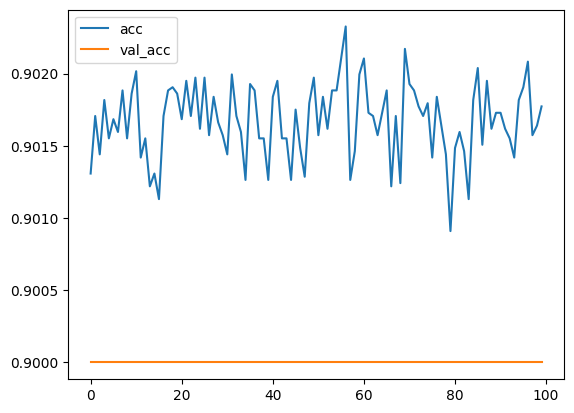

In [73]:
plt.plot(r.history['accuracy'], label = 'acc')
plt.plot(r.history['val_accuracy'], label = 'val_acc')
plt.legend();

In [ ]:
num_cols = x_train.select_dtypes(include = ('int64', 'float64')).columns
cat_cols = x_train.select_dtypes(include = ('object', 'category')).columns

It looks like the error is occurring because you are trying to apply StandardScaler to columns that contain string values (like 'technician' in the 'job' column). StandardScaler is designed for numerical data. To fix this, we need to handle the categorical columns first. Here is a plan to address this:

Identify categorical and numerical columns: Separate the columns in x_train and x_test into categorical and numerical types.
Preprocess categorical columns: Apply one-hot encoding to the categorical columns.
Preprocess numerical columns: Apply StandardScaler to the numerical columns.
Combine preprocessed columns: Combine the scaled numerical and one-hot encoded categorical columns into a single array for both training and testing sets.
Apply scaler to combined data: Apply StandardScaler to the combined numerical and one-hot encoded categorical data.
Finish task: Briefly explain the steps taken and confirm that the data is now ready for model training.